Given an m x n integer matrix heightMap representing the height of each unit cell in a 2D elevation map, return the volume of water it can trap after raining.

 

Example 1:

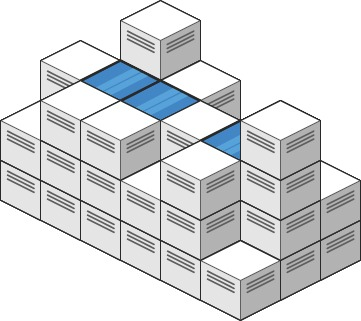

Input: heightMap = [[1,4,3,1,3,2],[3,2,1,3,2,4],[2,3,3,2,3,1]]
Output: 4
Explanation: After the rain, water is trapped between the blocks.
We have two small ponds 1 and 3 units trapped.
The total volume of water trapped is 4.

Example 2:

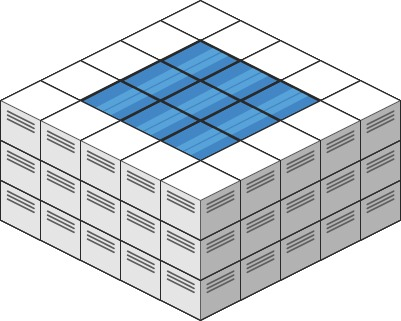

Input: heightMap = [[3,3,3,3,3],[3,2,2,2,3],[3,2,1,2,3],[3,2,2,2,3],[3,3,3,3,3]]
Output: 10

 

Constraints:

    m == heightMap.length
    n == heightMap[i].length
    1 <= m, n <= 200
    0 <= heightMap[i][j] <= 2 * 104



In [ ]:
class Solution:
    class Cell:
        def __init__(self, height, row, col):
            self.height = height
            self.row = row
            self.col = col

        # Comparison method for the priority queue (min-heap)
        def __lt__(self, other):
            return self.height < other.height

    # Helper function to check if a cell is valid (within grid bounds)
    def _is_valid_cell(self, row, col, num_of_rows, num_of_cols):
        return 0 <= row < num_of_rows and 0 <= col < num_of_cols

    def trapRainWater(self, heightMap: List[List[int]]) -> int:
        # Direction arrays
        d_row = [0, 0, -1, 1]
        d_col = [-1, 1, 0, 0]

        num_of_rows = len(heightMap)
        num_of_cols = len(heightMap[0])

        visited = [[False] * num_of_cols for _ in range(num_of_rows)]

        # Priority queue (min-heap) to process boundary cells in increasing height order
        boundary = []

        # Add the first and last column cells to the boundary and mark them as visited
        for i in range(num_of_rows):
            heapq.heappush(boundary, self.Cell(heightMap[i][0], i, 0))
            heapq.heappush(
                boundary,
                self.Cell(heightMap[i][num_of_cols - 1], i, num_of_cols - 1),
            )
            visited[i][0] = visited[i][num_of_cols - 1] = True

        # Add the first and last row cells to the boundary and mark them as visited
        for i in range(num_of_cols):
            heapq.heappush(boundary, self.Cell(heightMap[0][i], 0, i))
            heapq.heappush(
                boundary,
                self.Cell(heightMap[num_of_rows - 1][i], num_of_rows - 1, i),
            )
            visited[0][i] = visited[num_of_rows - 1][i] = True

        # Initialize the total water volume to 0
        total_water_volume = 0

        # Process cells in the boundary (min-heap will always pop the smallest height)
        while boundary:
            # Pop the cell with the smallest height from the boundary
            current_cell = heapq.heappop(boundary)

            current_row = current_cell.row
            current_col = current_cell.col
            min_boundary_height = current_cell.height

            # Explore all 4 neighboring cells
            for direction in range(4):
                # Calculate the row and column of the neighbor
                neighbor_row = current_row + d_row[direction]
                neighbor_col = current_col + d_col[direction]

                # Check if the neighbor is within the grid bounds and not yet visited
                if (
                    self._is_valid_cell(
                        neighbor_row, neighbor_col, num_of_rows, num_of_cols
                    )
                    and not visited[neighbor_row][neighbor_col]
                ):
                    # Get the height of the neighbor cell
                    neighbor_height = heightMap[neighbor_row][neighbor_col]

                    # If the neighbor's height is less than the current boundary height, water can be trapped
                    if neighbor_height < min_boundary_height:
                        # Add the trapped water volume
                        total_water_volume += (
                            min_boundary_height - neighbor_height
                        )

                    # Push the neighbor into the boundary with updated height (to prevent water leakage)
                    heapq.heappush(
                        boundary,
                        self.Cell(
                            max(neighbor_height, min_boundary_height),
                            neighbor_row,
                            neighbor_col,
                        ),
                    )
                    visited[neighbor_row][neighbor_col] = True

        # Return the total amount of trapped water
        return total_water_volume